In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('sales_train_evaluation.csv')
data.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


In [3]:
attributes_dict = {
    'cat_ids': data['cat_id'].unique().tolist(),
    'state_ids': data['state_id'].unique().tolist(),
    'store_ids': data['store_id'].unique().tolist(),
    'dept_ids': data['dept_id'].unique().tolist()
}
attributes_dict

{'cat_ids': ['HOBBIES', 'HOUSEHOLD', 'FOODS'],
 'state_ids': ['CA', 'TX', 'WI'],
 'store_ids': ['CA_1',
  'CA_2',
  'CA_3',
  'CA_4',
  'TX_1',
  'TX_2',
  'TX_3',
  'WI_1',
  'WI_2',
  'WI_3'],
 'dept_ids': ['HOBBIES_1',
  'HOBBIES_2',
  'HOUSEHOLD_1',
  'HOUSEHOLD_2',
  'FOODS_1',
  'FOODS_2',
  'FOODS_3']}

In [4]:
data[data['item_id'] == 'HOBBIES_1_001']

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
3049,HOBBIES_1_001_CA_2_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_2,CA,0,0,0,0,...,2,0,2,0,2,2,0,2,0,1
6098,HOBBIES_1_001_CA_3_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_3,CA,0,0,0,0,...,2,6,0,1,0,2,1,0,1,0
9147,HOBBIES_1_001_CA_4_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_4,CA,0,0,0,0,...,1,0,3,1,1,1,0,1,2,2
12196,HOBBIES_1_001_TX_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,TX_1,TX,0,0,0,0,...,0,0,0,2,1,0,2,1,0,1
15245,HOBBIES_1_001_TX_2_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,TX_2,TX,0,0,0,0,...,0,0,0,0,0,2,0,0,0,1
18294,HOBBIES_1_001_TX_3_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,TX_3,TX,0,0,0,0,...,1,0,3,0,0,3,1,1,2,1
21343,HOBBIES_1_001_WI_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,WI_1,WI,0,0,0,0,...,0,1,0,2,0,0,0,0,1,2
24392,HOBBIES_1_001_WI_2_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,WI_2,WI,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
27441,HOBBIES_1_001_WI_3_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
sell_prices = pd.read_csv('sell_prices.csv')

In [6]:
items = data['item_id'].unique()
items, items.size

(array(['HOBBIES_1_001', 'HOBBIES_1_002', 'HOBBIES_1_003', ...,
        'FOODS_3_825', 'FOODS_3_826', 'FOODS_3_827'], dtype=object),
 3049)

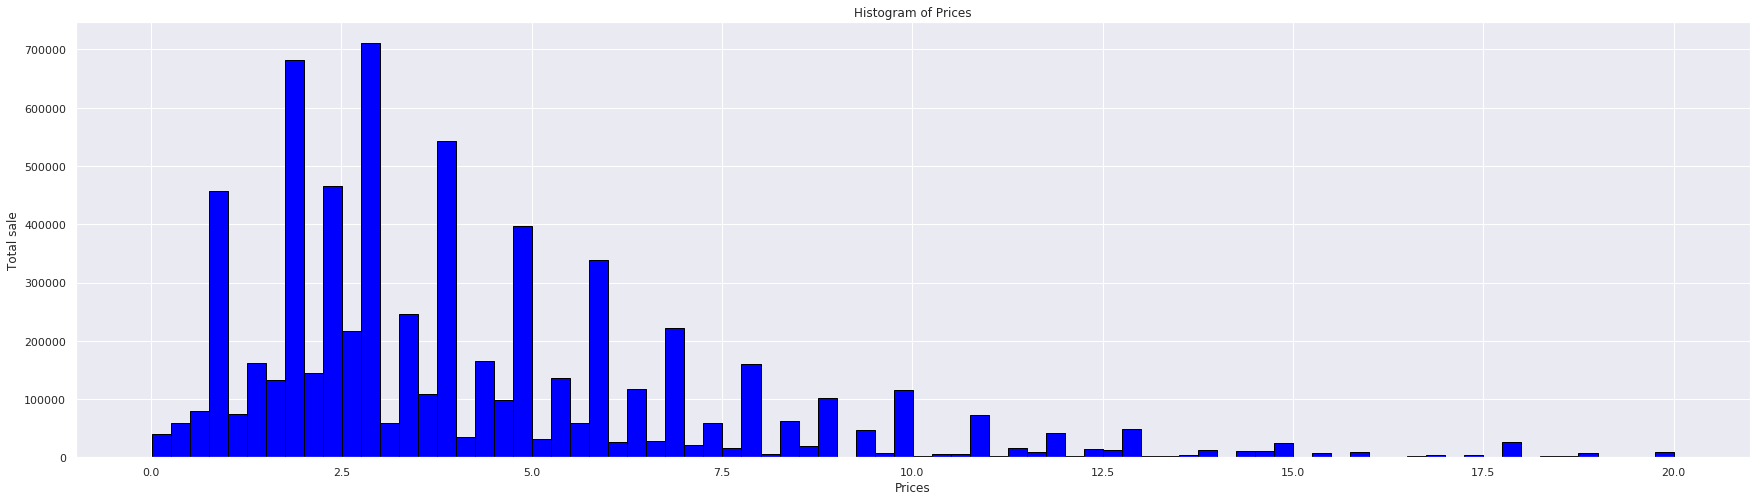

In [7]:

fig = plt.figure(figsize=(30,8))
plt.hist(sell_prices.loc[sell_prices['sell_price'] <= 20.0]['sell_price'], 
             bins=80, color = 'blue', edgecolor='black')
# Add labels
plt.title('Histogram of Prices')
plt.xlabel('Prices')
plt.ylabel('Total sale')
plt.show()

In [8]:
max(sell_prices['sell_price']), min(sell_prices['sell_price'])

(107.32, 0.01)

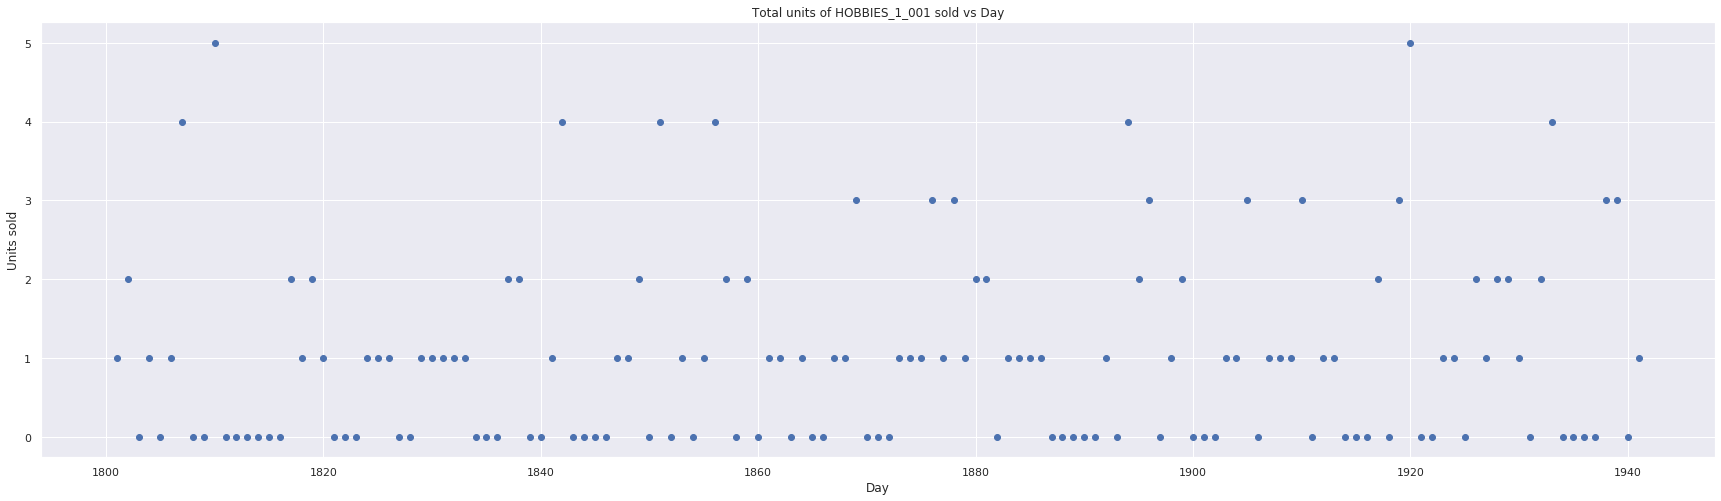

In [9]:
item_id = 'HOBBIES_1_001'
example_hobbies1 = data[(data['item_id'] == item_id) & (data['store_id'] == 'CA_1')].to_numpy()[0][6:]
fig = plt.figure(figsize=(30,8))
plt.scatter(range(1, 1942)[1800:], example_hobbies1[1800:])
plt.xlabel('Day')
plt.ylabel('Units sold')
plt.title(f'Total units of {item_id} sold vs Day')
plt.show()

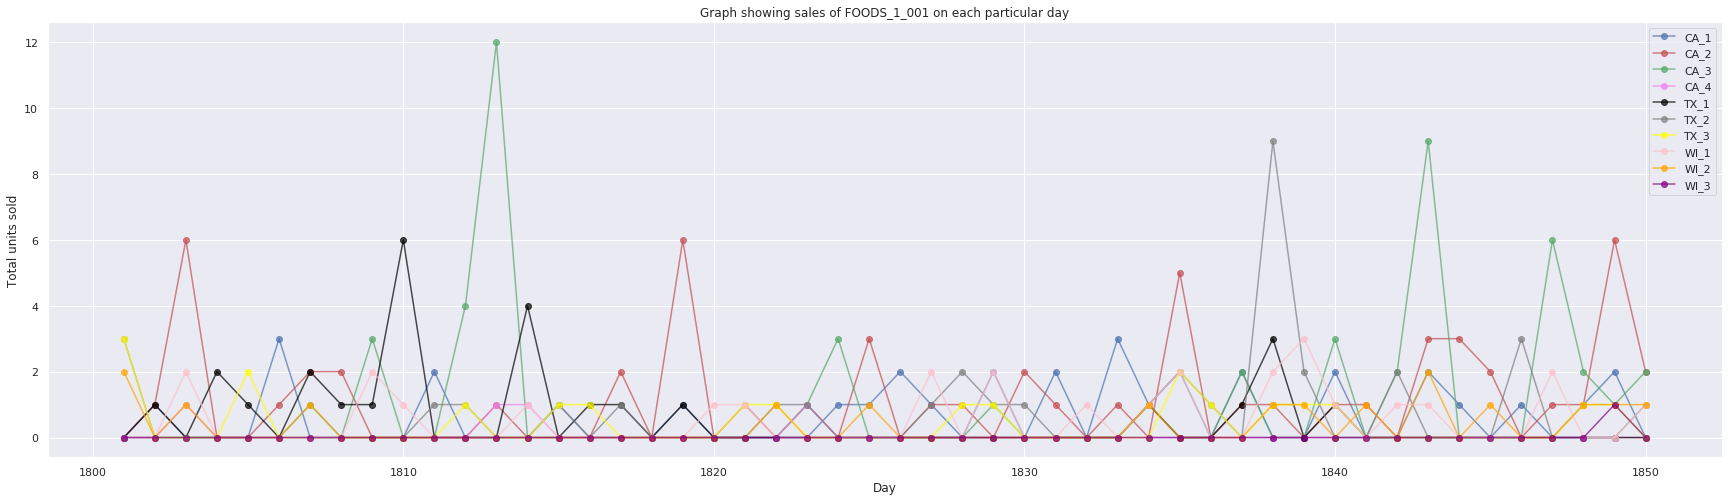

In [10]:
#compare data of one item at 10 locations
item_id = 'FOODS_1_001'
data_item = data[(data['item_id'] == item_id)].reset_index(drop=True)
plt.figure(figsize=(30,8))
c = ['b', 'r', 'g','violet','black', 'grey', 'yellow', 'pink', 'orange', 'purple']
for index, row in data_item.iterrows():
    plt.plot(range(1, 1942)[1800:1850], row[6:][1800:1850], alpha=0.7,marker='o', c=c[index], label=row['store_id'])
plt.legend()
plt.xlabel('Day')
plt.ylabel('Total units sold')
plt.title(f'Graph showing sales of {item_id} on each particular day')
plt.show()